## **Capstone Project 2: Customer Relationship Management Analysis of Gamma**

**JCDS 0406 011 - Muhamad Shidqi**

# Background Statement

Gamma is software as a service (SaaS) company based at United State of America who selling software for other companies (B2B) and delivered it to customer via Amazon Web Service (AWS) platform. Gamma offer software as innovative solution that fit for some industries.

After four years of operation Gamma have a good financial performance, this indicate from profit that Gamma make from 2020 to 2023. Based on that condition, Board of Gamma think this is the right time to have Gamma Customer Relation Management Program who called GCRM.

Purpose of GCRM are intended to improve customer-company connections by effectively understanding, managing, and utilizing customer interactions. Gamma want to increase customer satisfaction by providing specialized services, increase loyalty by responding of particular desires, increase revenue by finding opportunities or streamline operations, and provide a deeper understanding of clients through data analysis. GCRM in the final phases want develops better and more lasting relationships between Gamma and their consumers by prioritizing customer demands and experiences.

Board decide first phase of GCRM implementation are have branchs office in several countries outside USA as representative council of Gamma. The branch will consist of Account Manager who will be assigned to assist Gamma customer in the country.

## Problem Statement
As first phase implementation of GCRM, company want know **which city that suit for the branch location** and **what product in that countries in the subregion that have most customer**. This information will help Gamma to choose city for the branch and background field for the members of the branch in the country.

From the explanation above, we conclude some questions:

1. What country and city that meet the criterias for branch location?

2. What product at subregion of the branch location who have most customers?

As a **data analyst**, we will try to answer the question above.



## Objective
Our objective are:

1. Examine country and city that meet criterias.

2. Examine city and products that have most customers in the country.

# Data
To achive our objective, let's analyze Gamma Sales Dataser that provide by company. The dataset can be access here : 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
source = pd.read_csv('Gamma-Sales.csv')
source

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.2480,3,0.20,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.9600,2,0.00,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.5760,2,0.20,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.6000,4,0.00,13.3200


## Data Understanding and Cleaning
Before we go to analysis, we should known our dataset condition to have better data understanding. From this stage, we will know anomalies that exist inside our dataset and we need take care that anomalies in data wrangling and cleaning process. All things that we have done with these anomalies will be have explanations from domain knowledge or statistic wise. 

First, we let's see general information about this dataset.

| **No** | **Column Name** |                                   **Description**                                  | **Data Type** |
|:------:|:---------------:|:----------------------------------------------------------------------------------:|:-------------:|
|      1 | Row ID          | A unique identifier for each transaction.                                          |     Object    |
|      2 | Order ID        | A unique identifier for each order.                                                |     Object    |
|      3 | Order Date      | The date when order was placed                                                     |   Date Time   |
|      4 | Year            | A numerical representation of the order date. (Year)                               |    Integer    |
|      5 | Contact Name    | The name of person who placed the order.                                           |     Object    |
|      6 | Country         | The country where the order was placed.                                            |     Object    |
|      7 | City            | The city where the order was placed.                                               |     Object    |
|      8 | Region          | The region where the order was placed.                                             |     Object    |
|      9 | Subregion       | The subregion where the order was placed.                                          |     Object    |
|     10 | Customer        | The name of company that placed the order.                                         |     Object    |
|     11 | Customer ID     | A unique identifier for each customer.                                             |     Object    |
|     12 | Industry        | The industry the customer belongs to.                                              |     Object    |
|     13 | Segment         | The customer segment (SMB, Strategic, and Enterprise)                              |     Object    |
|     14 | Product         | The product was ordered.                                                           |     Object    |
|     15 | License         | The license key for every product. Unique for every product from every transaction |     Object    |
|     16 | Sales           | The total sales amount for the transaction in hundred USD.                         |     Float     |
|     17 | Quantity        | The total number of items in the transaction. Minimum value is 1.                  |    Integer    |
|     18 | Discount        | The discount applied to the transaction between range 0.0 to 1.0                   |     Float     |
|     19 | Profit          | The profit from transaction in hundred USD.                                        |     Float     |

In [3]:
print(f'Total data and columns in Saas Sales dataset is {source.shape[0]} rows and {source.shape[1]} columns.')
source.info()

Total data and columns in Saas Sales dataset is 9994 rows and 19 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 1

In [4]:
display(source.describe(), source.describe(include='object'))

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,9994.000000,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896
std,2885.163629,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108
min,1.000000,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000


,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,793,48,262,3,12,99,10,3,14,9994
top,EMEA-2023-100111,9/6/2022,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,Finance,SMB,ContactMatcher,16GRM07R1K
freq,14,38,37,2001,922,4219,2507,192,2127,5191,1842,1


### Data Type
From information above we known some columns have inappropriate data type, these columns need to change their data type:

Order Date should be a ***datetime*** not ***object***;

Date Key should become **Year**;
    
Customer ID should be a ***object*** not ***integer***; and

Row ID should become **index**.

In [5]:
#Change Customer ID
source['Customer ID'] = source['Customer ID'].astype(object)

#Change Order Date
source['Order Date'] = source['Order Date'].astype('datetime64[ns]')

#Change Value of Date Key become Year
source['Date Key'] = source['Order Date'].dt.year.astype('object')
#Rename Date Key become Year
source = source.rename(columns={'Date Key':'Year'})

#Multiply Sales and Profit
source['Sales'] = source['Sales']*100
source['Profit'] = source['Profit']*100

#Make Row ID as Index
source.set_index('Row ID', inplace=True)

display(source.describe(), source.describe(include='object'), source)

,Sales,Quantity,Discount,Profit
count,9.994000e+03,9994.000000,9994.000000,9994.000000
mean,2.298580e+04,3.789574,0.156203,2865.689631
std,6.232451e+04,2.225110,0.206452,23426.010769
min,4.440000e+01,1.000000,0.000000,-659997.800000
25%,1.728000e+03,2.000000,0.000000,172.875000
50%,5.449000e+03,3.000000,0.200000,866.650000
75%,2.099400e+04,5.000000,0.200000,2936.400000
max,2.263848e+06,14.000000,0.800000,839997.600000


,Order ID,Year,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,4,793,48,262,3,12,99,99,10,3,14,9994
top,EMEA-2023-100111,2023,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,1080,Finance,SMB,ContactMatcher,16GRM07R1K
freq,14,3319,37,2001,922,4219,2507,192,192,2127,5191,1842,1


,Order ID,Order Date,Year,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,
1,EMEA-2022-152156,2022-11-09,2022,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,26196.00,2,0.00,4191.36
2,EMEA-2022-152156,2022-11-09,2022,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,73194.00,3,0.00,21958.20
3,AMER-2022-138688,2022-06-13,2022,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,1462.00,2,0.00,687.14
4,EMEA-2021-108966,2021-10-11,2021,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,95757.75,5,0.45,-38303.10
5,EMEA-2021-108966,2021-10-11,2021,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,2236.80,2,0.20,251.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,EMEA-2020-110422,2020-01-22,2020,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,2524.80,3,0.20,410.28
9991,AMER-2023-121258,2023-02-27,2023,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,9196.00,2,0.00,1563.32
9992,AMER-2023-121258,2023-02-27,2023,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,25857.60,2,0.20,1939.32


In [6]:
#Recheck data type
source.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 1 to 9994
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      9994 non-null   object        
 1   Order Date    9994 non-null   datetime64[ns]
 2   Year          9994 non-null   object        
 3   Contact Name  9994 non-null   object        
 4   Country       9994 non-null   object        
 5   City          9994 non-null   object        
 6   Region        9994 non-null   object        
 7   Subregion     9994 non-null   object        
 8   Customer      9994 non-null   object        
 9   Customer ID   9994 non-null   object        
 10  Industry      9994 non-null   object        
 11  Segment       9994 non-null   object        
 12  Product       9994 non-null   object        
 13  License       9994 non-null   object        
 14  Sales         9994 non-null   float64       
 15  Quantity      9994 non-null   int64   

### Check Missing and Duplicate Values

#### Check Duplicate

In [7]:
#Check Duplicate Data
print(f'Duplicated data found : {source.duplicated().sum()}')
if(source.duplicated().sum() == 0):
    print("No duplicate data was found in this dataset.")
else:
    print("Duplicate data was found in the dataset. We should look further this duplicate.")

Duplicated data found : 0
No duplicate data was found in this dataset.


#### Check Null Values

In [8]:
#Check Null Values
source.isnull().sum()

Order ID        0
Order Date      0
Year            0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

No null data was found in our dataset.

#### Check NaN Values

In [9]:
#Check NaN Values
source.isna().sum()

Order ID        0
Order Date      0
Year            0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

No missing data was found in our dataset

### Unique value from every columns in AWS SaaS Dataset

In [10]:
pd.set_option('display.max_colwidth', None)
list_unique = []
for x in source.columns:
    if(x == 'Order Date'):
        list_unique.append([x, source[x].nunique(), source[x].apply(lambda x : x.date()).unique()])
    else:
        list_unique.append([x, source[x].nunique(), source[x].unique()])
unique_value = pd.DataFrame(data=list_unique,
                            columns=['Column Name', 'Number of Unique', 'Unique Value'])
unique_value

,Column Name,Number of Unique,Unique Value
0,Order ID,5009,"[EMEA-2022-152156, AMER-2022-138688, EMEA-2021-108966, AMER-2020-115812, EMEA-2023-114412, AMER-2022-161389, APJ-2021-118983, EMEA-2020-105893, EMEA-2020-167164, AMER-2020-143336, AMER-2022-137330, EMEA-2023-156909, EMEA-2021-106320, AMER-2022-121755, EMEA-2021-150630, APJ-2023-107727, APJ-2022-117590, APJ-2021-117415, APJ-2023-120999, AMER-2022-101343, EMEA-2023-139619, EMEA-2022-118255, AMER-2020-146703, APJ-2022-169194, APJ-2021-115742, EMEA-2022-105816, EMEA-2022-111682, AMER-2021-135545, APJ-2021-164175, AMER-2020-106376, EMEA-2022-119823, EMEA-2022-106075, AMER-2023-114440, EMEA-2021-134026, APJ-2023-118038, APJ-2020-147606, EMEA-2022-127208, AMER-2020-139451, EMEA-2021-149734, APJ-2023-119662, AMER-2023-140088, EMEA-2023-155558, APJ-2022-159695, AMER-2022-109806, EMEA-2021-149587, EMEA-2023-109484, EMEA-2023-161018, AMER-2023-157833, EMEA-2022-149223, APJ-2022-158568, EMEA-2022-129903, EMEA-2021-156867, EMEA-2023-119004, APJ-2021-129476, EMEA-2023-146780, EMEA-2022-128867, AMER-2020-115259, AMER-2021-110457, EMEA-2021-136476, APJ-2022-103730, APJ-2020-152030, APJ-2020-134614, AMER-2023-107272, AMER-2022-125969, AMER-2023-164147, AMER-2022-145583, EMEA-2022-110366, AMER-2023-106180, EMEA-2023-155376, AMER-2021-110744, AMER-2020-110072, EMEA-2022-114489, AMER-2022-158834, AMER-2021-124919, AMER-2021-118948, AMER-2020-104269, APJ-2022-114104, AMER-2022-162733, EMEA-2021-119697, APJ-2022-154508, AMER-2022-113817, APJ-2020-139892, AMER-2020-118962, APJ-2020-100853, APJ-2023-152366, AMER-2021-101511, EMEA-2021-137225, APJ-2020-166191, EMEA-2020-158274, EMEA-2022-105018, AMER-2020-123260, APJ-2022-157000, EMEA-2021-102281, AMER-2021-131457, AMER-2020-140004, AMER-2023-107720, EMEA-2023-124303, AMER-2023-105074, EMEA-2020-133690, APJ-2023-116701, ...]"
1,Order Date,1237,"[2022-11-09, 2022-06-13, 2021-10-11, 2020-06-09, 2023-04-16, 2022-12-06, 2021-11-22, 2020-11-11, 2020-05-13, 2020-08-27, 2022-12-10, 2023-07-17, 2021-09-25, 2022-01-16, 2021-09-17, 2023-10-20, 2022-12-09, 2021-12-27, 2023-09-11, 2022-07-18, 2023-09-20, 2022-03-12, 2020-10-20, 2022-06-21, 2021-04-18, 2022-12-12, 2022-06-18, 2021-11-24, 2021-04-30, 2020-12-05, 2022-06-05, 2022-09-19, 2023-09-15, 2021-04-26, 2023-12-10, 2020-11-26, 2020-10-12, 2021-09-03, 2023-11-14, 2023-05-29, 2023-10-27, 2022-04-06, 2022-09-18, 2021-01-31, 2023-11-07, 2023-11-10, 2023-06-18, 2022-09-07, 2022-08-30, 2022-12-02, 2021-11-13, 2023-11-24, 2021-10-15, 2023-12-26, 2022-11-04, 2020-08-25, 2021-03-02, 2021-04-05, 2020-12-26, 2020-09-20, 2023-11-06, 2022-11-07, 2023-02-03, 2022-10-14, 2022-09-06, 2023-09-19, 2023-12-23, 2021-09-07, 2020-10-22, 2022-03-14, 2021-05-31, 2021-05-28, 2020-03-01, 2022-11-21, 2022-05-12, 2021-12-28, 2022-11-17, 2022-11-08, 2020-09-08, 2020-08-05, 2020-09-14, 2023-04-22, 2021-11-21, 2021-12-15, 2020-11-19, 2022-11-29, 2020-08-26, 2022-07-17, 2021-10-12, 2021-10-31, 2020-03-21, 2023-07-07, 2023-06-25, 2020-08-03, 2023-12-18, 2023-06-04, 2023-12-02, 2021-02-09, 2021-01-02, 2022-10-29, ...]"
2,Year,4,"[2022, 2021, 2020, 2023]"
3,Contact Name,793,"[Nathan Bell, Deirdre Bailey, Zoe Hodges, Thomas Hodges, Adrian Hunter, Adrian Abraham, Emily Morrison, Claire Welch, Carol Campbell, Blake Hughes, Melanie Sharp, Luke Bower, Jonathan Ferguson, Sam Parsons, Neil Gill, Amelia Campbell, Chloe Short, Jasmine Metcalfe, Karen Mathis, Dylan Dickens, Sophie Lewis, Gavin Mitchell, Katherine Dowd, Harry Brown, Brian Dickens, Joseph Newman, Nicola Howard, Stewart Wilson, Eric McLean, Leah Clarkson, Alison Davidson, Sophie Vance, Anne Lee, Maria Dyer, Julia Ellison, Gordon McLean, Jessica Buckland, Bernadette Nolan, Sonia Ince, William Lewis, Melanie Young, Edward Oliver, Peter Quinn, Max Marshall, Jan Watson, Carol Ball, Gavin Walsh, Penelope Peake, Amy Scott, Carl Jackson, Joe Wallace, Luke Mills, Alexandra Dyer, Rebecca Dickens, Audrey Hardacre, Jennifer Dowd, Natalie Sanderson, Samantha Rampling, Sally Berry, Anthony Cla

#### Check Invalid Category Members

##### Location Category

In [11]:
#Region
pd.set_option('display.max_colwidth', None)
list_subregion = []
for x in source['Region'].unique():
    list_subregion.append([x, source[source['Region'] == x]['Subregion'].nunique(), source[source['Region'] == x]['Subregion'].unique()])
unique_subregion = pd.DataFrame(data=list_subregion,
                            columns=['Region', 'Number of Subregion', 'Subregion'])
unique_subregion

,Region,Number of Subregion,Subregion
0,EMEA,6,"[UKIR, EU-WEST, NOR, EU, MEA, EU-EAST]"
1,AMER,2,"[NAMER, LATAM]"
2,APJ,4,"[JAPN, ANZ, APAC, IND]"


In [12]:
#Subregion from EMEA Region
list_country_emea = []
for x in source[source['Region'] == 'EMEA']['Subregion'].unique():
    list_country_emea.append([x, source[source['Subregion'] == x]['Country'].nunique(), source[source['Subregion'] == x]['Country'].unique()])
unique_country_emea = pd.DataFrame(data=list_country_emea,
                            columns=['Subregion', 'Number of Country', 'Country'])
unique_country_emea

,Subregion,Number of Country,Country
0,UKIR,2,"[Ireland, United Kingdom]"
1,EU-WEST,13,"[Germany, France, Luxembourg, Spain, Portugal, Belgium, Netherlands, Poland, Austria, Denmark, Croatia, Slovenia, Iceland]"
2,NOR,3,"[Sweden, Finland, Norway]"
3,EU,1,[Italy]
4,MEA,6,"[Turkey, South Africa, Saudi Arabia, United Arab Emirates, Egypt, Qatar]"
5,EU-EAST,5,"[Russia, Czech Republic, Israel, Ukraine, Greece]"


The EMEA subregion category has some inaccuracies.
*   The EMEA Region should be Europe (EU).
*   The MEA subregion should be included in the Asia region as Western Asia (WA). In the MEA subregion, there are also countries like Egypt and South Africa, which should be part of the African region, while is not included yet in this data.
*   Turkey should be in the Eastern Europe (EU-East) subregion.
*   Furthermore, there is an error in the EU subregion, which only includes Italy. Italy should be in the EU-West subregion.
*   Additionally, there are inaccuracies in some countries in the EU-West subregion. Denmark and Iceland should be in the NOR region. While, Croatia and Slovenia should be in the EU-East region.

In [13]:
#Subregion from APJ Region
list_country_apj = []
for x in source[source['Region'] == 'APJ']['Subregion'].unique():
    list_country_apj.append([x, source[source['Subregion'] == x]['Country'].nunique(), source[source['Subregion'] == x]['Country'].unique()])
unique_country_apj = pd.DataFrame(data=list_country_apj,
                            columns=['Subregion', 'Number of Country', 'Country'])
unique_country_apj

,Subregion,Number of Country,Country
0,JAPN,1,[Japan]
1,ANZ,2,"[Australia, New Zealand]"
2,APAC,6,"[Philippines, Singapore, South Korea, China, Indonesia, Taiwan]"
3,IND,1,[India]


The APJ subregion category has some inaccurasies.

* The JAPN subregion should be included in the East Asia (EA) region.

* In the APAC subregion, China, Taiwan, and South Korea should be in the East Asia (EA) region. The APAC subregion should actually be Southeast Asia (SEA).

*   The IND region should be South Asia (SA), even though it currently only has one country, India.

*   Based on the previous explanations, there is also a West Asia (WA) subregion that was previously classified under Europe.

* Furthermore, considering the members of the APJ region, it would be more appropriate to call this region Asia-Pacific (APAC).

In [14]:
#Subregion from AMER Region
list_country_amer = []
for x in source[source['Region'] == 'AMER']['Subregion'].unique():
    list_country_amer.append([x, source[source['Subregion'] == x]['Country'].nunique(), source[source['Subregion'] == x]['Country'].unique()])
unique_country_amer = pd.DataFrame(data=list_country_amer,
                            columns=['Subregion', 'Number of Country', 'Country'])
unique_country_amer

,Subregion,Number of Country,Country
0,NAMER,2,"[United States, Canada]"
1,LATAM,6,"[Costa Rica, Brazil, Chile, Colombia, Mexico, Argentina]"


In America Region (AMER), there are only a few inaccuracies. 

*   Mexico and Costa Rica should be in the NOMER subregion.

In [15]:
#Let's make some subregion adjustment based on country location
mapping_subregion = {
    'Denmark' : 'NOR',
    'Iceland' : 'NOR',
    'Croatia' : 'EU-EAST',
    'Slovenia' : 'EU-EAST',
    'Turkey' : 'EU-EAST',
    'Italy' : 'EU-WEST',
    'Qatar' : 'WA',
    'Saudi Arabia' : 'WA',
    'United Arab Emirates' : 'WA',
    'Japan' : 'EA',
    'China' : 'EA',
    'Taiwan' : 'EA',
    'South Korea' : 'EA',
    'Indonesia' : 'SEA',
    'Philippines' : 'SEA',
    'Singapore' : 'SEA',
    'India' : 'SA',
    'Costa Rica' : 'NAMER',
    'Mexico' : 'NAMER',
    'Egypt' : 'NAf',
    'South Africa' : 'SSA'
}
source['Subregion'] = np.where(source['Country'].isin(mapping_subregion.keys()), source['Country'].map(mapping_subregion), source['Subregion'])

In [16]:
#Let's make some region adjustment based on Subregion
mapping_region = {
    'NAf' : 'AFR',
    'SSA' : 'AFR',
    'WA' : 'APJ'
}
source['Region'] = np.where(source['Subregion'].isin(mapping_region.keys()), source['Subregion'].map(mapping_region), source['Region'])

In [17]:
#Subregion for Africa (AFR) Region
list_country_afr = []
for x in source[source['Region'] == 'AFR']['Subregion'].unique():
    list_country_afr.append([x, source[source['Subregion'] == x]['Country'].nunique(), source[source['Subregion'] == x]['Country'].unique()])
unique_afr = pd.DataFrame(data = list_country_afr,
                          columns = ['Subregion', 'Number of Country', 'Country'])
unique_afr

,Subregion,Number of Country,Country
0,SSA,1,[South Africa]
1,NAf,1,[Egypt]


After the adjustment, the African Region is now included in our dataset.

In [18]:
#Let's rename our region
source['Region'].replace({'EMEA' : 'EU', 'APJ' : 'APAC'}, inplace=True)

In [19]:
#Country from Europe (EU) Region
list_city_eu = []
for x in source[source['Region'] == 'EU']['Country'].unique():
    list_city_eu.append([x, source[source['Country'] == x]['City'].nunique(), source[source['Country'] == x]['City'].unique()])
unique_city_eu = pd.DataFrame(data=list_city_eu,
                            columns=['Country', 'Number of City', 'City'])
unique_city_eu

,Country,Number of City,City
0,Ireland,3,"[Dublin, Cork, Limerick]"
1,Germany,11,"[Stuttgart, Hanover, Cologne, Munich, Leipzig, Dresden, Hamburg, Berlin, Frankfurt, Nuremberg, Mannheim]"
2,Sweden,4,"[Stockholm, Uppsala, Malmö, Gothenburg]"
3,Italy,12,"[Naples, Rome, Genoa, Milan, Venice, Turin, Bologna, Florence, Brescia, Bari, Palermo, Catania]"
4,Turkey,4,"[Ankara, Istanbul, Izmir, Bursa]"
5,France,5,"[Paris, Lyon, Nice, Nantes, Marseille]"
6,Luxembourg,1,[Luxembourg]
7,United Kingdom,14,"[London, Brighton, Leicester, Cardiff, Birmingham, Liverpool, Edinburgh, Leeds, Woking, Manchester, Belfast, Bristol, Glasgow, Newcastle]"
8,Spain,8,"[Madrid, Murcia, Alicante, Seville, Zaragoza, Barcelona, Valencia, Granada]"
9,Portugal,2,"[Lisboa, Porto]"


In [20]:
#Country from Asia-Pacific (APAC) Region
list_city_apac = []
for x in source[source['Region'] == 'APAC']['Country'].unique():
    list_city_apac.append([x, source[source['Country'] == x]['City'].nunique(), source[source['Country'] == x]['City'].unique()])
unique_city_apac = pd.DataFrame(data=list_city_apac,
                            columns=['Country', 'Number of City', 'City'])
unique_city_apac

,Country,Number of City,City
0,Japan,13,"[Saitama, Tokyo, Aichi, Osaka, Chiba, Fukuoka, Kanagawa, Hyogo, Sapporo, Shizuoka, Kyoto, Ibaraki, Hiroshima]"
1,Australia,10,"[Wollongong, Sydney, Canberra, Geelong, Melbourne, Adelaide, Brisbane, Hobart, Gold Coast, Perth]"
2,Philippines,3,"[Davao City, Manila, Quezon City]"
3,India,6,"[Kolkata, Mumbai, Delhi, Bangalore, Chennai, Hyderabad]"
4,Singapore,1,[Singapore]
5,New Zealand,2,"[Wellington, Auckland]"
6,Saudi Arabia,3,"[Riyadh, Dhahran, Jeddah]"
7,South Korea,5,"[Incheon, Seoul, Daegu, Gwangju, Busan]"
8,United Arab Emirates,2,"[Abu Dhabi, Dubai]"
9,China,7,"[Shanghai, Shenzhen, Guangzhou, Beijing, Tianjin, Suzhou, Chengdu]"


In [21]:
#Country from America (AMER) Region
list_city_amer = []
for x in source[source['Region'] == 'AMER']['Country'].unique():
    list_city_amer.append([x, source[source['Country'] == x]['City'].nunique(), source[source['Country'] == x]['City'].unique()])
unique_city_amer = pd.DataFrame(data=list_city_amer,
                            columns=['Country', 'Number of City', 'City'])
unique_city_amer

,Country,Number of City,City
0,United States,68,"[New York City, Los Angeles, Aurora, Newark, Chicago, Raleigh, Providence, Oklahoma City, Rochester, Seattle, Detroit, Lafayette, Jacksonville, Long Beach, Henderson, Columbus, Milwaukee, San Francisco, Miami, Yonkers, Roswell, Baltimore, Atlanta, Jackson, Springfield, Richmond, Huntsville, San Diego, Louisville, Tampa, Virginia Beach, Philadelphia, Columbia, Oakland, Dallas, Phoenix, Anaheim, Lawrence, Austin, Burlington, Sacramento, Fort Worth, Houston, Nashville, Wilmington, Indianapolis, Lakewood, Arlington, San Jose, Fresno, Lakeland, Lancaster, Buffalo, San Antonio, Cleveland, Charlotte, Tucson, Tulsa, Denver, Alexandria, Las Vegas, Minneapolis, Omaha, Franklin, Tallahassee, Everett, Clinton, Memphis]"
1,Canada,10,"[Toronto, Vancouver, Hamilton, Ottawa, Montreal, Calgary, Quebec, Regina, Winnipeg, Victoria]"
2,Costa Rica,1,[San José]
3,Brazil,6,"[Salvador, Rio de Janeiro, São Paulo, Manaus, Belo Horizonte, Brasília]"
4,Chile,3,"[Puente Alto, Santiago, Antofagasta]"
5,Colombia,3,"[Bogotá, Medellín, Cali]"
6,Mexico,8,"[Mexico City, Monterrey, Guadalajara, Puerto Vallarta, Toluca, Tijuana, Cancun, Cabo San Lucas]"
7,Argentina,4,"[Córdoba, Buenos Aires, Mendoza, Rosario]"


In [22]:
#Country from Africa (AFR) Region
list_city_afr = []
for x in source[source['Region'] == 'AFR']['Country'].unique():
    list_city_afr.append([x, source[source['Country'] == x]['City'].nunique(), source[source['Country'] == x]['City'].unique()])
unique_city_afr = pd.DataFrame(data = list_city_afr,
                               columns = ['Country', 'Number of City', 'City'])
unique_city_afr

,Country,Number of City,City
0,South Africa,2,"[Cape Town, Johannesburg]"
1,Egypt,1,[Cairo]


Now the classification of **Regions, Subregions, and Countries** is correct.

#### Customer Category

In [23]:
#Let's Check out Customer Information
# pd.set_option('display.max_row', None)
list_customer = []
for x in source['Customer ID'].unique():
    list_customer.append([x, source[source['Customer ID'] == x]['Customer'].unique(), source[source['Customer ID'] == x]['Contact Name'].unique(), source[source['Customer ID'] == x]['Industry'].unique(), source[source['Customer ID'] == x]['Country'].unique(), source[source['Customer ID'] == x]['Segment'].unique()])
unique_customer = pd.DataFrame(data = list_customer,
                               columns = ['Customer ID', 'Name of Customer', 'Name of Representative', 'Industry', 'Country of Operations', 'Segment'])
unique_customer.sort_values(by='Customer ID', inplace=True)
unique_customer.reset_index(inplace=True)
unique_customer.drop('index', axis=1, inplace=True)
unique_customer

,Customer ID,Name of Customer,Name of Representative,Industry,Country of Operations,Segment
0,1001,[Abbott Laboratories],"[Eric McLean, Colin Hamilton, Joseph White, Ryan Turner, Ryan Jackson]",[Healthcare],"[Australia, United Kingdom, Chile, Sweden, France, United States, Brazil, Ukraine, Ireland, Singapore, China, Canada]","[Enterprise, SMB, Strategic]"
1,1002,[Aetna],"[Sophie Vance, Natalie Sanderson, Jasmine MacLeod, Gordon Parr, Carol Edmunds, Warren Abraham, Ella King, Phil Tucker, Keith Morrison, Karen Howard, Victor Avery]",[Healthcare],"[United Kingdom, Philippines, Japan, United States, Canada, France, Brazil, Portugal, Belgium, South Africa, Sweden, Spain, Netherlands, Australia, Czech Republic, Chile, Singapore, Argentina, Mexico, Germany, Finland]","[SMB, Strategic]"
2,1003,[Allstate],"[Jonathan Clark, Joan Dickens, Christopher James, Diana Black, Faith Campbell, Adrian Clarkson, Harry McLean, Lucas Newman, Ryan Johnston]",[Finance],"[United States, Ukraine, United Kingdom, Ireland, Sweden, Canada, Finland, Israel, Luxembourg, France, Japan, Australia, India, Argentina, Czech Republic, Germany, Norway, Chile, Saudi Arabia, Mexico, Singapore, Netherlands]","[Strategic, SMB, Enterprise]"
3,1004,[Amazon],"[Rebecca Dickens, Thomas Peters, Julian Nash, Kimberly Newman, Alan White, Victoria Roberts, Adam Manning, Nicholas May, Adam Davidson, Hannah Hughes, Adrian Walker, Peter Nolan]",[Tech],"[Mexico, Saudi Arabia, United States, South Korea, Germany, Spain, Chile, Japan, France, Canada, New Zealand, Belgium, Czech Republic, Russia, Australia, United Kingdom, China, South Africa, Ireland, Italy, Finland, Brazil]","[SMB, Strategic]"
4,1005,[American Express],"[Anthony Sanderson, Edward Wilkins, Lily North, Chloe Underwood, Liam Murray, Molly Scott, Emily Ross, Steven Coleman, Carol Berry, Bernadette Scott]",[Finance],"[Canada, Norway, United States, South Korea, Japan, Australia, France, Argentina, United Kingdom, Mexico, Italy, India, Saudi Arabia, Germany, Chile, Russia, Greece, Finland, Sweden, South Africa, Ireland, Brazil, China, Poland]","[SMB, Strategic]"
...,...,...,...,...,...,...
94,1097,[Walt Disney],"[Virginia Carr, Megan Smith, Zoe Bond, Sue Parsons, Brian Hunter, Irene Johnston, Brandon Vaughan, Liam Robertson, Nicholas Paterson]",[Communications],"[United Kingdom, Spain, Japan, France, Canada, Colombia, Argentina, United States, Finland, Australia, Mexico, Brazil, Netherlands, Germany, Sweden, Singapore, Chile, Norway, United Arab Emirates]","[Enterprise, Strategic, SMB]"
95,1098,[Nissan Motor],"[Maria Dyer, Joe Wallace, Melanie Davidson, Owen Ferguson, Melanie Dowd, Michael Lewis, Nathan Hughes, Trevor Metcalfe]",[Transportation],"[Japan, Australia, Brazil, India, United Kingdom, Saudi Arabia, Russia, Italy, Germany, United States, Norway, South Africa, Mexico, Argentina, Sweden, Canada, Portugal, Belgium]","[Strategic, Enterprise, SMB]"
96,1099,[Wells Fargo],"[Blake Hughes, Justin Randall, Joe Ross, Irene Walsh, Sue Ince, Melanie Chapman, Warren Reid, Peter Johnston]",[Finance],"[United States, Japan, Brazil, Philippines, United Kingdom, Czech Republic, France, Mexico, South Africa, New Zealand, Spain, Germany, Saudi Arabia, India, Argentina, Russia, Sweden, Chile, Finland]","[SMB, Strategic, Enterprise]"
97,1100,[Trafigura Group],"[Penelope Peake, Audrey Hardacre, Joseph Forsyth, Anne Rutherford, Alexandra Slater, Audrey Alsop, Edward Hardacre, Leonard Poole, Jennifer Payne, Phil Turner]",[Finance],"[Luxembourg, Canada, United Kingdom, Argentina, United States, Spain, Netherlands, Japan, Indonesia, Finland, Portugal, India, Mexico, Turkey, Germany, Costa Rica, Brazil, Chile, China, Norway, Poland, South Korea, New Zealand, Australia, South Africa, Russia, France]","[SMB, Strategic, Enterprise]"


Based on the table above, no errors were found in the **Customer** variable. This refers to the absence of any **Customer ID** that is associated with two different industries, even though they operate in more than one country.

#### Check Invalid Values

In [24]:
#Check invalid value for Sales, Quantity, Discount, and Profit.

#Sales can't have negative value.

#Quantity can't have negative and decilmal value.

#Discount is decimal value from 0.0 to 1.0.

revenue_cycle = source[['Sales', 'Quantity', 'Discount', 'Profit']]
display(revenue_cycle.min(), revenue_cycle.max())

Sales           44.4
Quantity         1.0
Discount         0.0
Profit     -659997.8
dtype: float64

Sales       2263848.0
Quantity         14.0
Discount          0.8
Profit       839997.6
dtype: float64

There were no invalid values found in Sales, Quantity, Discount, and Profit.

### Adjustment Coloumn to Support our Analysis

### Create Applied Discount Column based on Discount

In [25]:
#Create New Coloumn for Applied Discount Category
source['Applied Discount'] = np.where(source['Discount']>0, 1, 0).astype(bool)
source

,Order ID,Order Date,Year,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Applied Discount
Row ID,,,,,,,,,,,,,,,,,,,
1,EMEA-2022-152156,2022-11-09,2022,Nathan Bell,Ireland,Dublin,EU,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,26196.00,2,0.00,4191.36,False
2,EMEA-2022-152156,2022-11-09,2022,Nathan Bell,Ireland,Dublin,EU,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,73194.00,3,0.00,21958.20,False
3,AMER-2022-138688,2022-06-13,2022,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,1462.00,2,0.00,687.14,False
4,EMEA-2021-108966,2021-10-11,2021,Zoe Hodges,Germany,Stuttgart,EU,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,95757.75,5,0.45,-38303.10,True
5,EMEA-2021-108966,2021-10-11,2021,Zoe Hodges,Germany,Stuttgart,EU,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,2236.80,2,0.20,251.64,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,EMEA-2020-110422,2020-01-22,2020,Dan Allan,Germany,Hamburg,EU,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,2524.80,3,0.20,410.28,True
9991,AMER-2023-121258,2023-02-27,2023,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,9196.00,2,0.00,1563.32,False
9992,AMER-2023-121258,2023-02-27,2023,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,25857.60,2,0.20,1939.32,True


## Data Analysis

We have done do data cleaning and wrengling process. Now, we can start analyze the data to provide valuable insight to the board for making informed decisions about **the locations of Gamma Branch Offices**.

The analysis will consider the following data points from our dataset:

1. **Demand and Spending** : We will analyze demand from total transactions and spending from sales median value of every subregion compare to sales median value from belonging region. The criteria are the demand have more than (>=) **Average Demand of Region** or if the demand are below (<) the **Average Demand of Region**, the spending at subregion have to more than (>=) **Average Spending of belonging Region**. We need to satisfy one of these criteria to determine the **Subregion** are potential. This will help in identifying potential locations with high demand for the product.

2. **Customer and Customer ID** : Evaluate the concentration of existing customers. This can help in identifying areas with a high customer base, which may be suitable for opening branch offices.


3. **Profit and Sales** : Analyze the profitability and sales performance in different country on that subregion to identify self financing.

### Parameter

**Based on Region**

First, let's look at the distribution of customers and the transaction value based on the **Region** to determine **Parameters**. We will analyze the number of **Customer IDs** on each **Region**, average of **Order ID** as representive of the demand on each **Region**, and the median value of **Sales** as representative of the **Customer Spending** as on each **Region** to obtain the following information:

1. The proportion of **Customer** spread on each **Region**.

2. **Demand** on each  **Region**.

2. **Customer Spending** on each **Region**.

In [26]:
#Proportion Customer Distribution
list_customer_spread = []
for x in source['Year'].unique():
    for z in source['Region'].unique():
        list_customer_spread.append([x, z, source[(source['Year'] == x) & (source['Region'] == z)]['Customer ID'].nunique()])
customer_spread = pd.DataFrame(data = list_customer_spread,
                               columns = ['Year', 'Region', 'Total Customer'])
customer_spread.sort_values(by=['Year', 'Region'], inplace=True)
customer_spread.reset_index(inplace=True)
customer_spread.drop('index', axis=1, inplace=True)
#Filter by year
customer_spread_2020 = customer_spread[customer_spread['Year'] == 2020]
customer_spread_2021 = customer_spread[customer_spread['Year'] == 2021]
customer_spread_2022 = customer_spread[customer_spread['Year'] == 2022]
customer_spread_2023 = customer_spread[customer_spread['Year'] == 2023]

#Create subplots with 2 rows and 2 columns
fig_customer_spread_region = make_subplots(rows=2, cols=2, subplot_titles=['2020', '2021', '2022', '2023'], specs=[[{'type':'pie'}, {'type':'pie'}], [{'type':'pie'}, {'type':'pie'}]])

#Create a pie chart for each year
for i, df in enumerate([customer_spread_2020, customer_spread_2021, customer_spread_2022, customer_spread_2023]):
    fig_customer_spread_region.add_trace(go.Pie(labels=df['Region'], values=df['Total Customer'], name=str(i+2020)), row=(i // 2) + 1, col=(i % 2) + 1)

#Update layout
fig_customer_spread_region.update_layout(height=600, width=800, title_text="Region Customer Spread by Year")

# Show the figure
fig_customer_spread_region.show()

Based on the chart above, the proportion of customers in **Africa** is **less than 10%**. When compared to other regions, which are around **30%**, the difference in the number of customers in Africa is **quite significant**. Therefore, it is not recommended at this time to open branch offices in Africa. If the company still wants to have account managers for customers in Africa, the company can place the account managers in the branch office geographically closest to Africa.

Now, let's see **Demand** based on **Transaction**.

In [27]:
#Create demand table
list_demand = []
for x in source['Year'].unique():
    for z in source[source['Region'] != 'AFR']['Region'].unique():
            for y in source['Subregion'].unique():
                list_demand.append([x, z, y, source[(source['Year'] == x) & (source['Region'] == z) & (source['Subregion'] == y)]['Order ID'].nunique()])
demand = pd.DataFrame(data = list_demand,
                               columns = ['Year', 'Region', 'Subregion', 'Demand'])
demand = demand[demand['Demand'] != 0]
demand.sort_values(by=['Year', 'Region'], inplace=True)
demand.reset_index(inplace=True)
demand.drop('index', axis=1, inplace=True)

#Create pivot table for examine Average Demand on Every Region
average_demand = demand.pivot_table(values='Demand', index='Region', columns='Year', aggfunc='median')
average_demand = average_demand.round(0).astype(int)
average_demand.columns.name = None
average_demand.reset_index(inplace=True)

#Create Bar Chart
for region in average_demand['Region'].unique():
    demand_region = average_demand[average_demand['Region'] == region]
    fig_demand_region = px.bar(demand_region, x='Region', y=[c for c in average_demand.columns if c != 'Region'], title=f'Average Demand per Year for {region}',
                               labels= {'value':'Demand', 'variable':'Year'},
                               barmode='group')
    display(fig_demand_region.show())

None

None

None

We have determined the **Average Demand** from the regions of the Americas, Asia-Pacific, and Europe each year. We will use the **Average Demand** as a Parameter to further identify the **Demand** from each **Subregion** of every region.

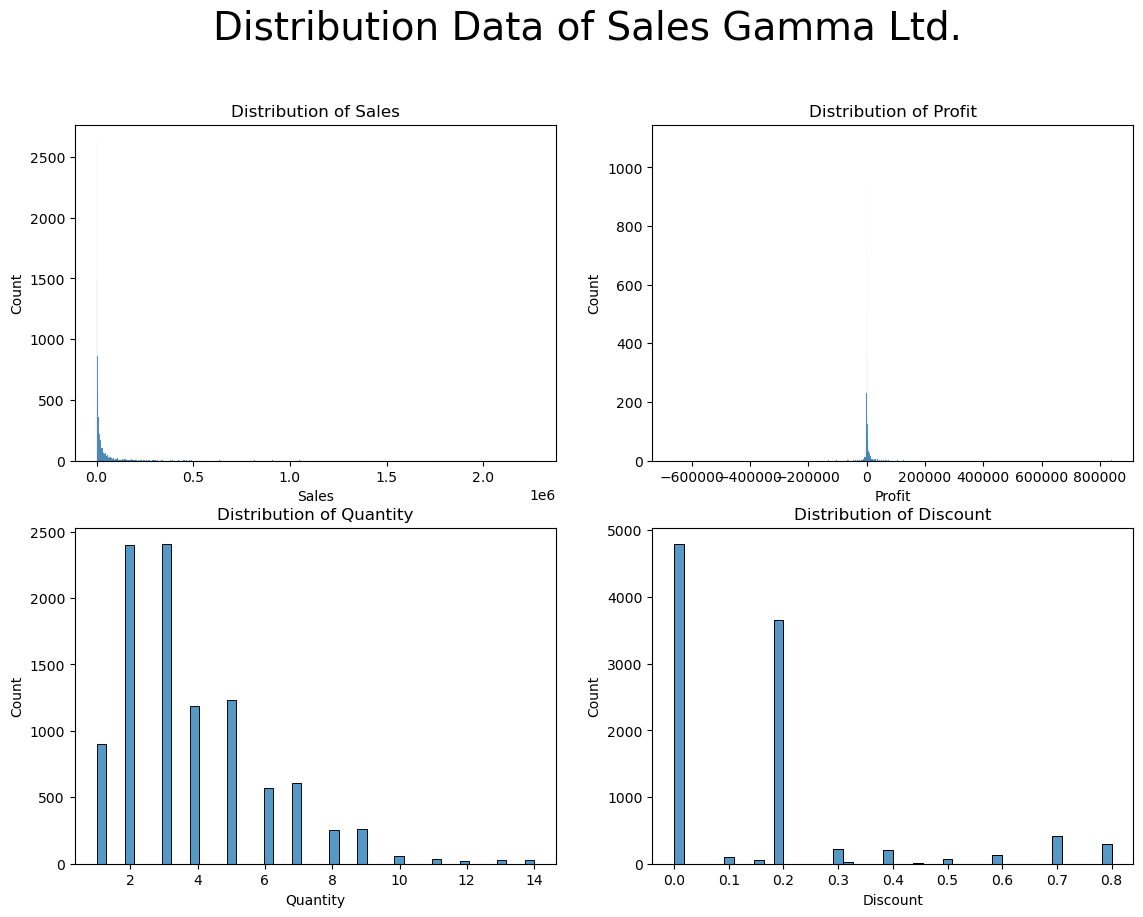

In [28]:
#Let's see distribution of the data
number = ['Sales', 'Profit', 'Quantity', 'Discount']
canvas = 0
n_width = 2
n_rows = 2
plt.figure(figsize=(13.66, 9.6))
for d in range(n_rows):
    for f in range(n_width):
        if canvas == 5:
            break
        else:
            plt.subplot(n_rows, n_width, canvas+1)
            sns.histplot(data=source, x=number[canvas])
            plt.title(f'Distribution of {number[canvas]}')
            canvas+=1
plt.suptitle('Distribution Data of Sales Gamma Ltd.', size=28, y=1.00)
plt.show()

We can see from chart above, our dataset doesn't distribute normally. So, we gonna should use median value as average parameter for our analysis.

In [33]:
#Compute Customer Spending Every Region
customer_spending = source.pivot_table(index='Region', columns='Year', values='Sales', aggfunc='median')
customer_spending.reset_index(inplace=True)
customer_spending = customer_spending[1:]
customer_spending = customer_spending.round(2)

#Create Bar Chart
fig_spending = px.bar(customer_spending, x='Region', y=[c for c in customer_spending.columns if c != 'Region'],
             title='Spending Customer per Year and Region in thousand USD',
             labels={'value': 'Customer Spending', 'variable': 'Year'},
             barmode='group')
display(fig_spending.show(), customer_spending)

None

Year,Region,2020,2021,2022,2023
1,AMER,5780.5,6396.0,5397.7,6526.4
2,APAC,3827.2,5350.4,4492.4,4299.4
3,EU,5259.6,5595.6,6012.0,4961.6


We have determined the **Customer Spending** from the regions of the Americas, Asia-Pacific, and Europe each year. We will use the **Customer Spending** as a Parameter to further identify the **Customer Spending** from each **Subregion** of every **Region**.

Now, we already have our **Parameters** as based to determine potential location for new **Gamma Branch Office** locations. Further analysis, shall we go to tableau via link below:

https://public.tableau.com/views/Shidqi_JCDS0406011_CapstoneModul2/DistributionofCustomer?:language=en-US&:display_count=n&:origin=viz_share_link

For see deeper our data 

### Asia-Pacific (APAC)

Now shall we look up APAC Region

In [31]:
# Asia-Pacific(APAC) Transaction
apac = source[source['Region'] == 'APAC']
apac.sort_values(by='Order ID', inplace=True)
apac.reset_index(inplace=True)
apac.drop('Row ID', axis=1, inplace=True)

C:\Users\semua\AppData\Local\Temp\ipykernel_41116\1264789626.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\semua\AppData\Local\Temp\ipykernel_41116\1264789626.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [46]:
#Determine Demand per Year of Subregion in Asia-Pacific (APAC)
list_demand_apac = []
for x in apac['Year'].unique():
    for y in apac['Subregion'].unique():
        list_demand_apac.append([x, y, apac[(apac['Year'] == x) & (apac['Subregion'] == y)]['Country'].unique(), apac[(apac['Year'] == x) & (apac['Subregion'] == y)]['Order ID'].nunique(), round(apac[(apac['Year'] == x) & (apac['Subregion'] == y)]['Sales'].median(), 0)])
demand_apac = pd.DataFrame(data = list_demand_apac,
                               columns = ['Year', 'Subregion', 'Country', 'Demand', 'Customer Spending'])
#Showing Parameter
print('Average Demand in Asia-Pacific (APAC) Region')
display(average_demand[average_demand['Region'] == 'APAC'])
print("Average Customer Spending in Asia-Pacific (APAC) Region in USD")
display(customer_spending[customer_spending['Region'] == 'APAC'])

#Create APAC Demand Line Cart
for subregion in demand_apac['Subregion'].unique():
    demand_APACsubregion = demand_apac[demand_apac['Subregion'] == subregion]
    fig_demand_apac = px.line(demand_APACsubregion, x='Year', y='Demand', title=f"Demand per Year for {subregion}")
    fig_demand_apac.update_layout(xaxis=dict(tickmode='linear', tick0=demand_apac['Year'].min(), dtick=1))
    for index, row in demand_APACsubregion.iterrows():
        fig_demand_apac.add_annotation(x=row['Year'], y=row['Demand'], text=f"Customer Spending: ${int(row['Customer Spending'])}",
                       showarrow=True, arrowhead=1)
    display(fig_demand_apac.show())

Average Demand in Asia-Pacific (APAC) Region


,Region,2020,2021,2022,2023
1,APAC,18,18,32,29


Average Customer Spending in Asia-Pacific (APAC) Region in USD


Year,Region,2020,2021,2022,2023
2,APAC,3827.2,5350.4,4492.4,4299.4


None

None

None

None

None

Based on the information above, we have observed the **Demand and Consumer Spending** trend from the **Subregions in the Asia Pacific**. All subregions in the Asia Pacific are considered **Potential Subregions** as they meet the predetermined criteria for demand and consumer spending.

### Europe (EU)

Next, shall we look up Europe Region

In [35]:
# Europe(EU) Transaction
eu = source[source['Region'] == 'EU']
eu.sort_values(by='Order ID', inplace=True)
eu.reset_index(inplace=True)
eu.drop('Row ID', axis=1, inplace=True)

C:\Users\semua\AppData\Local\Temp\ipykernel_41116\2889288901.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\semua\AppData\Local\Temp\ipykernel_41116\2889288901.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [36]:
#Determine Demand per Year of Subregion in Europe (EU)
list_demand_eu = []
for x in eu['Year'].unique():
    for y in eu['Subregion'].unique():
        list_demand_eu.append([x, y, eu[(eu['Year'] == x) & (eu['Subregion'] == y)]['Order ID'].nunique(), round(eu[(eu['Year'] == x) & (eu['Subregion'] == y)]['Sales'].median(), 0)])
demand_eu = pd.DataFrame(data = list_demand_eu,
                               columns = ['Year', 'Subregion', 'Demand', 'Customer Spending'])
#Showing Parameter
print('Average Demand in Europe (EU) Region')
display(average_demand[average_demand['Region'] == 'EU'])
print("Average Customer Spending in EU (EU) Region in USD")
display(customer_spending[customer_spending['Region'] == 'EU'])

#Create Europe (EU) Demand Line Cart
for subregion in demand_eu['Subregion'].unique():
    demand_EUsubregion = demand_eu[demand_eu['Subregion'] == subregion]
    fig_demand_eu = px.line(demand_EUsubregion, x='Year', y='Demand', title=f'Demand per Year for {subregion}')
    fig_demand_eu.update_layout(xaxis=dict(tickmode='linear', tick0=demand_apac['Year'].min(), dtick=1))
    for index, row in demand_EUsubregion.iterrows():
        fig_demand_eu.add_annotation(x=row['Year'], y=row['Demand'], text=f"Customer Spending: ${int(row['Customer Spending'])}",
                       showarrow=True, arrowhead=1)
    fig_demand_eu.show()

Average Demand in Europe (EU) Region


,Region,2020,2021,2022,2023
2,EU,80,96,118,146


Average Customer Spending in EU (EU) Region in USD


Year,Region,2020,2021,2022,2023
3,EU,5259.6,5595.6,6012.0,4961.6


Based on the information above, we have observed the **Demand and Consumer Spending** trend from the **Subregions in the Europe**. Northern Europe are **not Potential Subregion** because Northern Europe **doesn't have high demand or high consumer spending** though still have positive growth in demand. **UKIR, EU-West, and EU-East** are considered **Potential Subregions** as they meet the predetermined criteria for demand and consumer spending.

### Americas (AMER)

Last, shall we look up Americas Region

In [37]:
# Americas (AMER) Transaction
amer = source[source['Region'] == 'AMER']
amer.sort_values(by='Order ID', inplace=True)
amer.reset_index(inplace=True)
amer.drop('Row ID', axis=1, inplace=True)

C:\Users\semua\AppData\Local\Temp\ipykernel_41116\524656733.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\semua\AppData\Local\Temp\ipykernel_41116\524656733.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [38]:
#Determine Demand per Year of Subregion in Americas (AMER)
list_demand_amer = []
for x in amer['Year'].unique():
    for y in amer['Subregion'].unique():
        list_demand_amer.append([x, y, amer[(amer['Year'] == x) & (amer['Subregion'] == y)]['Order ID'].nunique(), round(amer[(apac['Year'] == x) & (amer['Subregion'] == y)]['Sales'].median(), 0)])
demand_amer = pd.DataFrame(data = list_demand_amer,
                               columns = ['Year', 'Subregion', 'Demand', 'Customer Spending'])
#Showing Parameter
print('Average Demand in Americas (AMER) Region')
display(average_demand[average_demand['Region'] == 'AMER'])
print("Average Customer Spending in Americas (AMER) Region in USD")
display(customer_spending[customer_spending['Region'] == 'AMER'])

#Create AMER Demand Line Cart
for subregion in demand_amer['Subregion'].unique():
    demand_AMERsubregion = demand_amer[demand_amer['Subregion'] == subregion]
    fig_demand_amer = px.line(demand_AMERsubregion, x='Year', y='Demand', title=f'Demand per Year for {subregion}')
    fig_demand_amer.update_layout(xaxis=dict(tickmode='linear', tick0=demand_apac['Year'].min(), dtick=1))
    for index, row in demand_AMERsubregion.iterrows():
        fig_demand_amer.add_annotation(x=row['Year'], y=row['Demand'], text=f"Customer Spending: ${int(row['Customer Spending'])}",
                       showarrow=True, arrowhead=1)
    fig_demand_amer.show()

Average Demand in Americas (AMER) Region


,Region,2020,2021,2022,2023
0,AMER,180,180,245,316


Average Customer Spending in Americas (AMER) Region in USD


Year,Region,2020,2021,2022,2023
1,AMER,5780.5,6396.0,5397.7,6526.4


Based on the information above, we have observed the **Demand and Consumer Spending** trend from the **Subregions in the Americas**. Just, **North America (NAMER)** are considered **Potential Subregions** as they meet the predetermined criteria for demand and consumer spending.